# Predicting Employee Compensation

Important Links:- 
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

Read the data and answer the following questions to predict employee compensation

## 1. Read the Data

In [1]:
!pip install pyspark

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 17.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=934a27d28c082477b0ce78fc34c2c80f23932143d5937ae0e5c4517edd959f0a
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [2]:
import pyspark
from pyspark.sql import DataFrame, SparkSession
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt

In [3]:
spark = SparkSession \
       .builder \
       .appName("Predicting_Employee_Compensation") \
       .getOrCreate()

spark

bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by bash)
bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by bash)
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/15 20:03:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
emp_df = spark.read.csv('/kaggle/input/d/syedasifmn/employee-compensation/Employee_Compensation.csv', inferSchema=True, header=True)
emp_df.show(5)

+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|               Union|Job Family Code|          Job Family|Job Code|                 Job|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+---

### 1.1 Display the number of rows and columns in the dataset

In [5]:
print(f'Row count: {emp_df.count()}')
print(f'Column count: {len(emp_df.columns)}')

Row count: 291825
Column count: 22


### 1.2 Check the datatype of the variables

In [6]:
for data in emp_df.dtypes:
    print(data[0]+" : "+data[1])

Year Type : string
Year : int
Organization Group Code : int
Organization Group : string
Department Code : string
Department : string
Union Code : int
Union : string
Job Family Code : string
Job Family : string
Job Code : string
Job : string
Employee Identifier : int
Salaries : double
Overtime : double
Other Salaries : double
Total Salary : double
Retirement : double
Health/Dental : double
Other Benefits : double
Total Benefits : double
Total Compensation : double


### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [7]:
for col in ["Job Family Code","Job Code"]:
    emp_df = emp_df.withColumn(col , emp_df[col].cast(IntegerType()))
emp_df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: integer (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: integer (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



In [8]:
emp_df = emp_df.drop(*["Union", "Employee Identifier"])
print(f'Column count after dropping redundant features: {len(emp_df.columns)}')

Column count after dropping redundant features: 20


### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [9]:
emp_df.describe().show()

+-------+---------+------------------+-----------------------+--------------------+---------------+-------------------+-----------------+------------------+--------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+
|summary|Year Type|              Year|Organization Group Code|  Organization Group|Department Code|         Department|       Union Code|   Job Family Code|          Job Family|          Job Code|               Job|         Salaries|          Overtime|   Other Salaries|     Total Salary|        Retirement|    Health/Dental|    Other Benefits|    Total Benefits|Total Compensation|
+-------+---------+------------------+-----------------------+--------------------+---------------+-------------------+-----------------+------------------+--------------------+------------------+------------------+-----------------+-

In [10]:
print("Row count with negative values for the following columns:")
for column in emp_df.columns:
    print(f"'{column}': {emp_df.filter(emp_df[column] < 0).count()}")

Row count with negative values for the following columns:


'Year Type': 0
'Year': 0
'Organization Group Code': 0
'Organization Group': 0
'Department Code': 0
'Department': 0
'Union Code': 0
'Job Family Code': 0
'Job Family': 0
'Job Code': 0
'Job': 0
'Salaries': 79
'Overtime': 30
'Other Salaries': 62
'Total Salary': 51
'Retirement': 422
'Health/Dental': 344
'Other Benefits': 679
'Total Benefits': 449
'Total Compensation': 246


In [11]:
emp_df.show()

+---------+----+-----------------------+--------------------+---------------+--------------------+----------+---------------+--------------------+--------+--------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|Job Family Code|          Job Family|Job Code|                 Job| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+--------------------+---------------+--------------------+----------+---------------+--------------------+--------+--------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|   Fiscal|2016|                      1|   Public Protection|            DAT|   District Attorney|       3

In [12]:
from pyspark.sql.functions import when, col, count

for column in emp_df.columns:
    emp_df = emp_df.withColumn(column, when(col(column) < 0, None).otherwise(col(column)))

In [13]:
print("Row count with negative values for the following columns:")
for column in emp_df.columns:
    print(f"'{column}': {emp_df.filter(emp_df[column] < 0).count()}")

Row count with negative values for the following columns:
'Year Type': 0
'Year': 0
'Organization Group Code': 0
'Organization Group': 0
'Department Code': 0
'Department': 0
'Union Code': 0
'Job Family Code': 0
'Job Family': 0
'Job Code': 0
'Job': 0
'Salaries': 0
'Overtime': 0
'Other Salaries': 0
'Total Salary': 0
'Retirement': 0
'Health/Dental': 0
'Other Benefits': 0
'Total Benefits': 0
'Total Compensation': 0


### 4. Perform Missing Value Analysis

In [14]:
from pyspark.sql.functions import when, col, count, isnull, isnan
emp_df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in emp_df.columns]).show()

+---------+----+-----------------------+------------------+---------------+----------+----------+---------------+----------+--------+---+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group|Department Code|Department|Union Code|Job Family Code|Job Family|Job Code|Job|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+------------------+---------------+----------+----------+---------------+----------+--------+---+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|                 0|              0|         0|        43|          34671|        45|   44161|  0|      79|      30|            62|          51|       422|          344|           679|   

In [15]:
dataset = emp_df.replace('null', None)\
        .dropna(how='any')

In [16]:
dataset.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in emp_df.columns]).show()


+---------+----+-----------------------+------------------+---------------+----------+----------+---------------+----------+--------+---+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group|Department Code|Department|Union Code|Job Family Code|Job Family|Job Code|Job|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+------------------+---------------+----------+----------+---------------+----------+--------+---+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|                 0|              0|         0|         0|              0|         0|       0|  0|       0|       0|             0|           0|         0|            0|             0|   

### 5. Exploratory Data Analysis

#### 5.1. Find top compensating organizations. Display using bar plot

In [17]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

df1 = dataset.groupBy("Organization Group") \
    .agg(max("Total Compensation").alias("total_comp")) \
    .orderBy(col("total_comp").desc())
df1.show()

+--------------------+----------+
|  Organization Group|total_comp|
+--------------------+----------+
|General Administr...| 653498.15|
|   Public Protection| 466798.21|
|Public Works, Tra...| 430872.68|
|    Community Health| 422799.94|
|Human Welfare & N...|  372586.3|
|Culture & Recreation| 318713.18|
|General City Resp...| 137930.88|
+--------------------+----------+



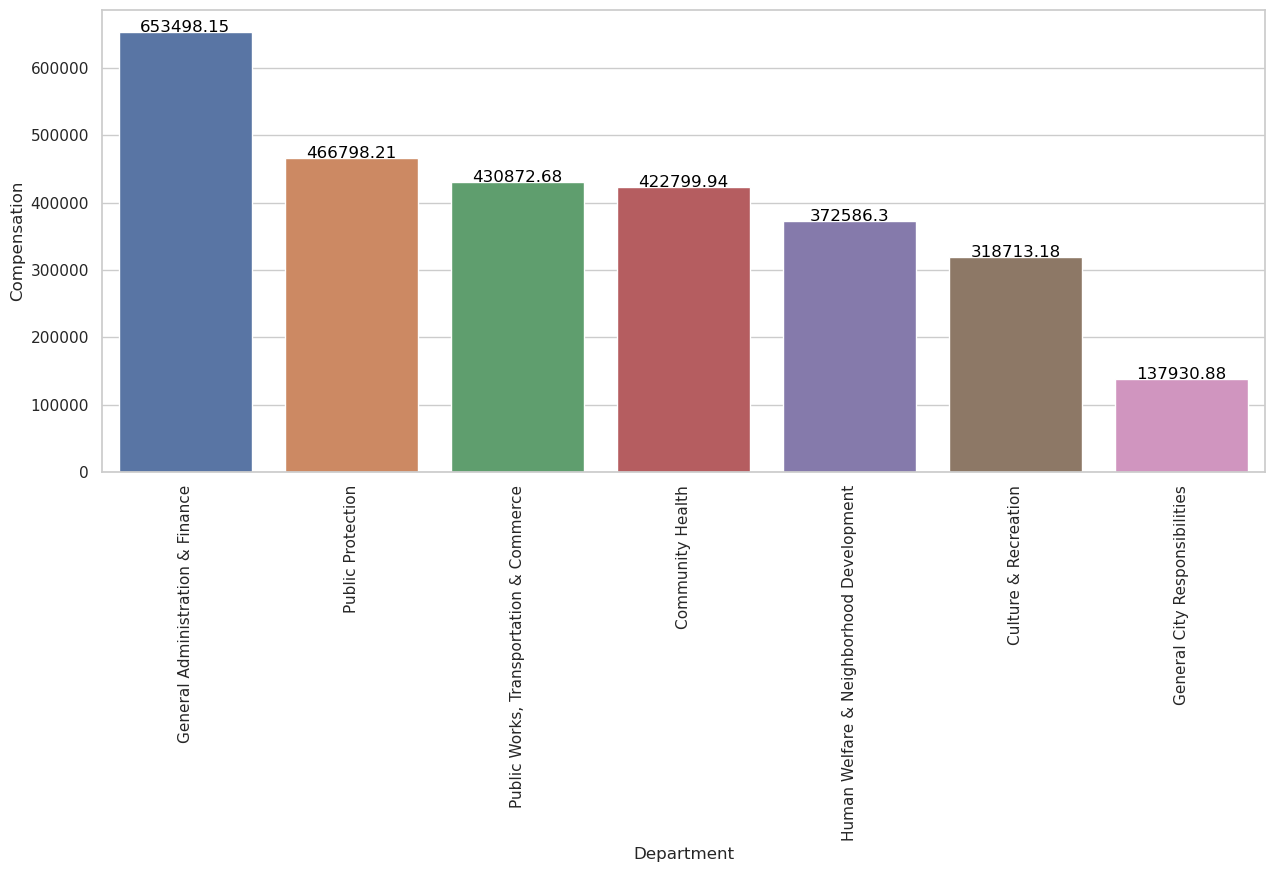

In [18]:
import seaborn as sns

org_groups = [data[0] for data in df1.select("Organization Group").collect()]
Total_Compensation = [data[0] for data in df1.select("total_comp").collect()]
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=org_groups, y=Total_Compensation)

for i, v in enumerate(Total_Compensation):
    plt.text(i, v, str(v), color='black', ha='center')
    
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.ylabel('Compensation')
plt.show()

#### 5.2. Find top Compensating Jobs. Display using bar plot

In [19]:
df2 = dataset.groupBy("Job") \
    .agg(max("Total Compensation").alias("total_comp")) \
    .orderBy(col("total_comp").desc())
df2.show()

+--------------------+----------+
|                 Job|total_comp|
+--------------------+----------+
|Chief Investment ...| 653498.15|
|   Asst Med Examiner|  497505.0|
|     Chief Of Police| 466798.21|
|         Dept Head V| 433302.72|
|Chief, Fire Depar...| 426006.85|
|Adm, SFGH Medical...| 422799.94|
|Executive Contrac...| 422019.78|
|Senior Physician ...| 418013.58|
|Gen Mgr, Public T...| 410459.56|
|Dep Dir For Inves...| 403743.76|
|      Deputy Sheriff| 402204.51|
|Administrator, De...| 395626.45|
|Supervising Physi...| 390385.45|
|               Mayor| 382624.61|
|Dep Chf Of Dept (...| 376513.82|
|         Anesthetist| 372001.33|
|          Controller| 368460.72|
|        Manager VIII| 363088.93|
|       Port Director| 362507.78|
|           Dep Dir V| 361599.97|
+--------------------+----------+
only showing top 20 rows



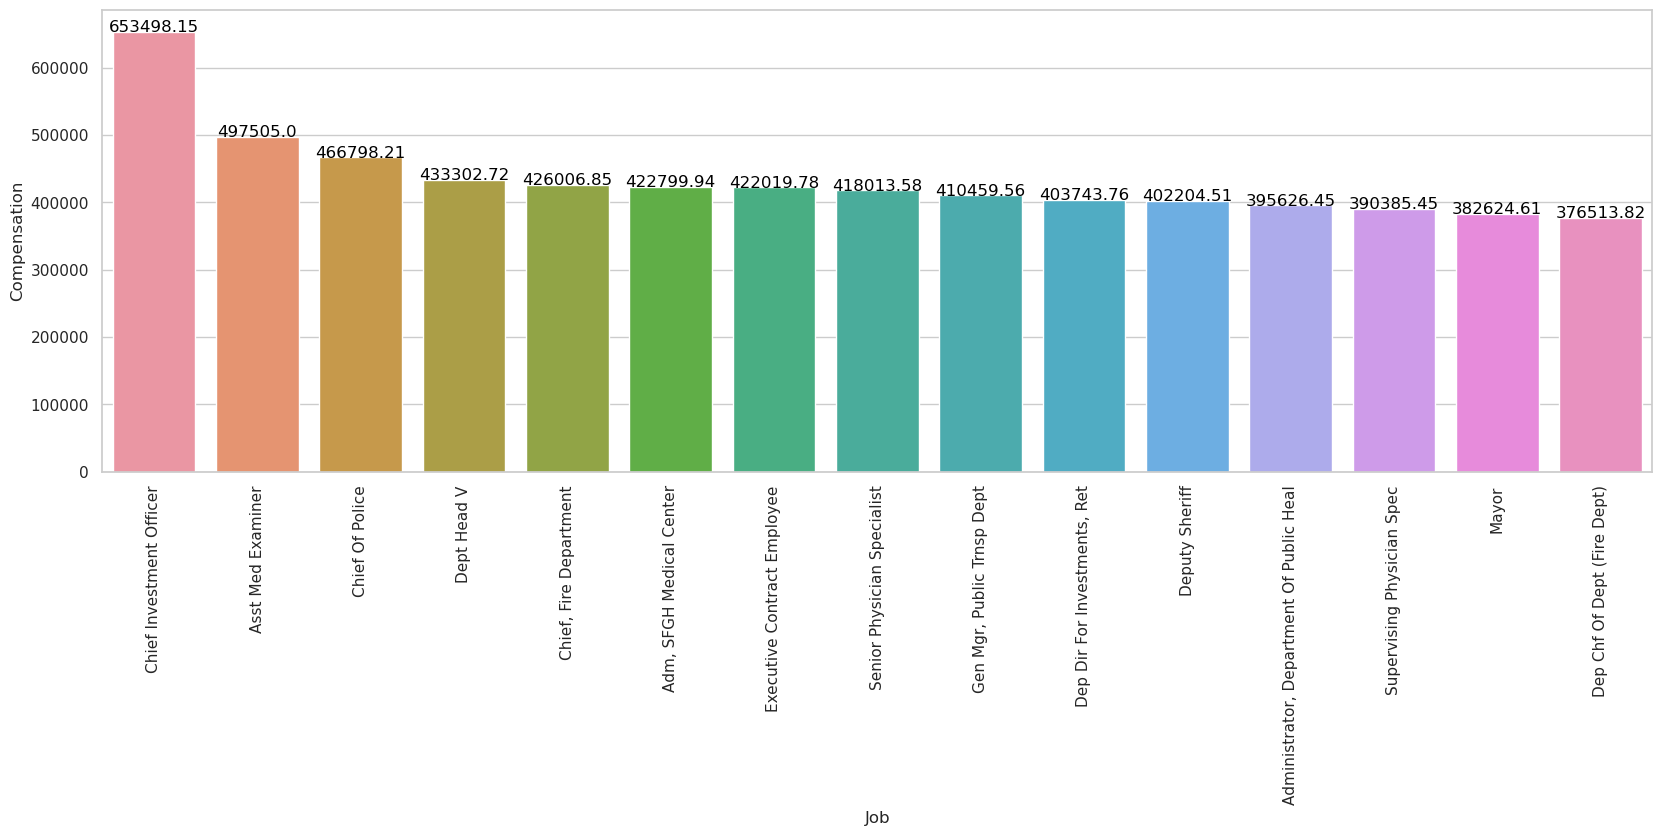

In [20]:
org_groups = [data[0] for data in df2.select("Job").collect()]
# Plotting only the first 15 top compensating jobs
org_groups = org_groups[:15]
Total_Compensation = [data[0] for data in df2.select("total_comp").collect()]
Total_Compensation = Total_Compensation[:15]
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=org_groups, y=Total_Compensation)

for i, v in enumerate(Total_Compensation):
    plt.text(i, v, str(v), color='black', ha='center')
    
plt.xlabel('Job')
plt.xticks(rotation=90)
plt.ylabel('Compensation')
plt.show()

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

<AxesSubplot:>

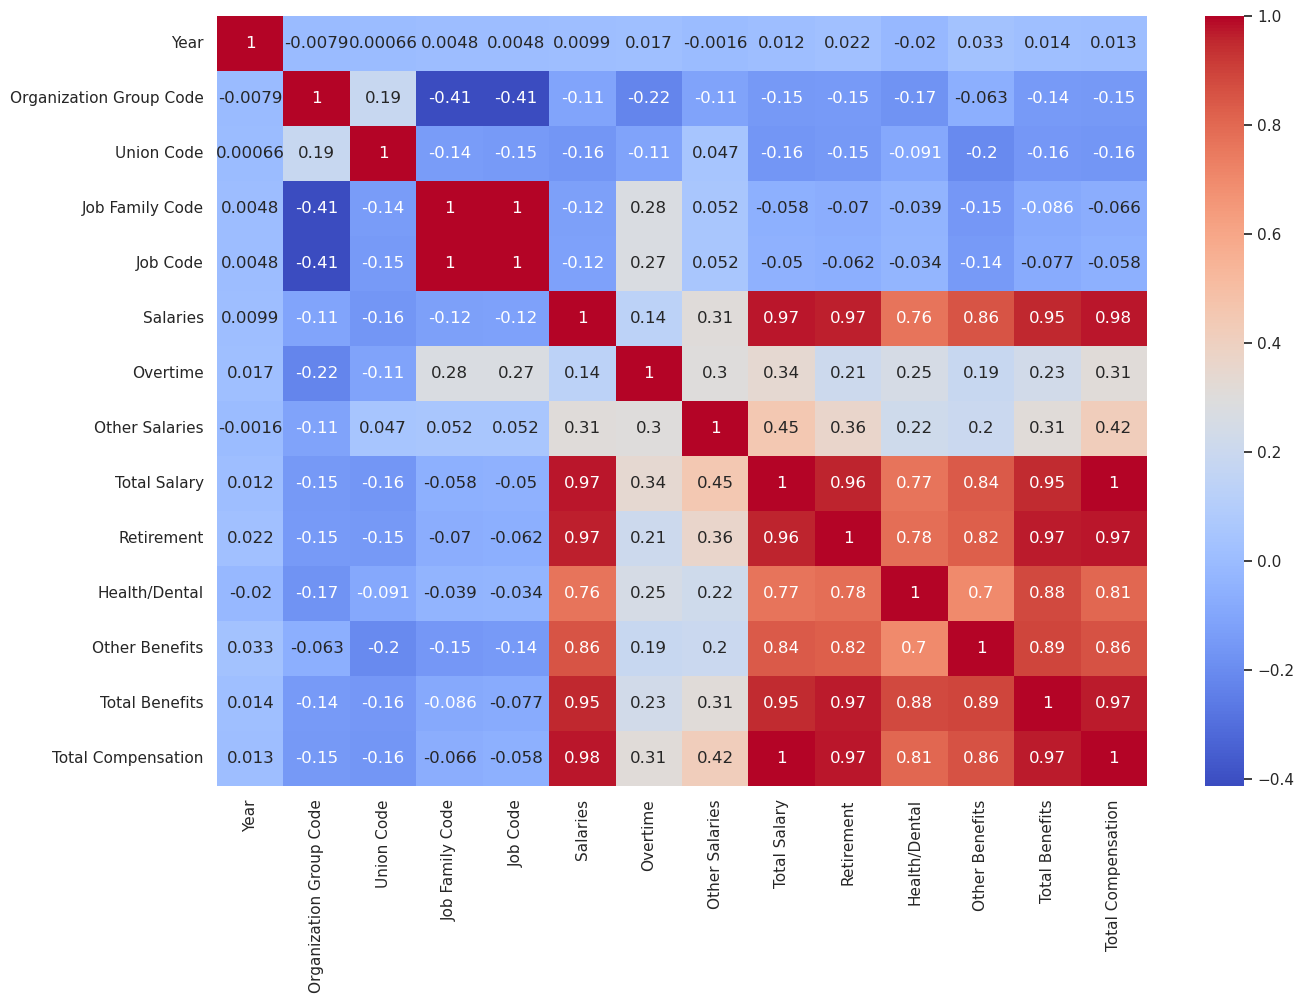

In [21]:
import pandas as pd

numericalColumns = [item[0] for item in dataset.dtypes if not item[1].startswith('string')]
#print(numericalColumns)

from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *

assembler = VectorAssembler(inputCols=numericalColumns, outputCol="features",handleInvalid='keep')
assembled_df = assembler.transform(dataset).select("features")

# correlation will be in Dense Matrix
correlation = Correlation.corr(assembled_df,"features","pearson").collect()[0][0]

plt.figure(figsize=(15, 10))
# To convert Dense Matrix into DataFrame
corr_matrix = correlation.toArray().tolist()
corr_matrix_df = pd.DataFrame(data=corr_matrix, columns = numericalColumns, index=numericalColumns)
sns.heatmap(corr_matrix_df, 
            xticklabels=corr_matrix_df.columns.values,
            yticklabels=corr_matrix_df.columns.values, cmap="coolwarm", annot=True)

### 6. Perform necessary data pre-processing and divide the data into train and test set

### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

In [22]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

categorical_col = [item[0] for item in dataset.dtypes if item[1].startswith('string')]
op_col = [i+"_indexed" for i in categorical_col]

indexer = StringIndexer(inputCols = categorical_col, outputCols = op_col, handleInvalid='keep')
model = indexer.fit(dataset)
indexed_df = model.transform(dataset)

out_col = [i+"Vec" for i in categorical_col]
encoder = OneHotEncoder(inputCols= op_col, outputCols=out_col)
encodedDF = encoder.fit(indexed_df).transform(indexed_df)

print(encodedDF.columns)

['Year Type', 'Year', 'Organization Group Code', 'Organization Group', 'Department Code', 'Department', 'Union Code', 'Job Family Code', 'Job Family', 'Job Code', 'Job', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits', 'Total Benefits', 'Total Compensation', 'Year Type_indexed', 'Organization Group_indexed', 'Department Code_indexed', 'Department_indexed', 'Job Family_indexed', 'Job_indexed', 'Year TypeVec', 'Organization GroupVec', 'Department CodeVec', 'DepartmentVec', 'Job FamilyVec', 'JobVec']


In [23]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import functions as F
from pyspark.ml.linalg import Vectors, VectorUDT

featurecol = ['Year', 'Organization Group Code', 'Union Code', 'Salaries', 'Overtime', 'Other Salaries',
 'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits', 'Total Benefits', 'Year TypeVec', 'Department CodeVec',
 'Job FamilyVec', 'JobVec']

assembler = VectorAssembler(inputCols= featurecol, outputCol= "features")
assembledDF = assembler.transform(encodedDF)
sparseToDense = F.udf(lambda v : Vectors.dense(v), VectorUDT())
densefeatureDF = assembledDF.withColumn('features_array', sparseToDense('features'))

### 6.2 Split the data into train and test set

In [24]:
trainDF, testDF =  assembledDF.randomSplit([0.7,0.3], seed = 23)

# print the count of observations in each set
print("Observations in training set = ", trainDF.count())
print("Observations in testing set = ", testDF.count())

23/02/15 20:04:18 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Observations in training set =  172330


Observations in testing set =  73596


### 7. Fit Linear Regression model on the data and check its performance

In [25]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='Total Compensation', maxIter=10, 
                      regParam=0.8, elasticNetParam=0.1)
lr_model = lr.fit(trainDF)

trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

lr_predictions = lr_model.transform(testDF)
lr_predictions.select("prediction","Total Compensation","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total Compensation",metricName="r2")
print("R Squared (R2) on val data = %g" % lr_evaluator.evaluate(lr_predictions))

23/02/15 20:04:34 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/02/15 20:04:34 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


RMSE: 3139.956156
r2: 0.997520


+------------------+------------------+--------------------+
|        prediction|Total Compensation|            features|
+------------------+------------------+--------------------+
|   85402.768618032|          85281.78|(1137,[0,1,2,3,6,...|
| 78207.44788334568|          78120.82|(1137,[0,1,2,3,6,...|
|144344.79402907693|         145278.19|(1137,[0,1,2,3,6,...|
|184214.89439548468|         198466.97|(1137,[0,1,2,3,6,...|
|   8587.3843379284|           3251.72|(1137,[0,1,2,3,6,...|
+------------------+------------------+--------------------+
only showing top 5 rows



R Squared (R2) on val data = 0.997478
